In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fe26c61dd30>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fe26c61dd30>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fe26c61d4e0>)


In [3]:
##############SGD With scheduler with no restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
range = 10
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

sgd_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / range, max_learning_rate=learning_rate * range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_no_restart)

learning_rate 0.075
epoch 1


Epoch 1: 10.0s to complete
    error(train)=9.91e-01, acc(train)=6.98e-01, error(valid)=1.01e+00, acc(valid)=6.91e-01


learning_rate 0.07498168105357779
epoch 2


Epoch 2: 10.7s to complete
    error(train)=7.40e-01, acc(train)=7.66e-01, error(valid)=7.64e-01, acc(valid)=7.60e-01


learning_rate 0.07492674229289958
epoch 3


Epoch 3: 9.9s to complete
    error(train)=6.21e-01, acc(train)=8.01e-01, error(valid)=6.56e-01, acc(valid)=7.89e-01


learning_rate 0.07483523793588934
epoch 4


Epoch 4: 8.2s to complete
    error(train)=5.65e-01, acc(train)=8.16e-01, error(valid)=6.13e-01, acc(valid)=8.02e-01


learning_rate 0.0747072582863
epoch 5


Epoch 5: 11.8s to complete
    error(train)=5.38e-01, acc(train)=8.20e-01, error(valid)=5.90e-01, acc(valid)=8.06e-01


learning_rate 0.07454292964459448
epoch 6


Epoch 6: 10.2s to complete
    error(train)=5.20e-01, acc(train)=8.24e-01, error(valid)=5.88e-01, acc(valid)=8.04e-01


learning_rate 0.07434241418330258
epoch 7


Epoch 7: 7.1s to complete
    error(train)=4.72e-01, acc(train)=8.38e-01, error(valid)=5.47e-01, acc(valid)=8.17e-01


learning_rate 0.074105909786976
epoch 8


Epoch 8: 4.6s to complete
    error(train)=4.47e-01, acc(train)=8.48e-01, error(valid)=5.31e-01, acc(valid)=8.23e-01


learning_rate 0.07383364985690043
epoch 9


Epoch 9: 5.6s to complete
    error(train)=4.34e-01, acc(train)=8.51e-01, error(valid)=5.30e-01, acc(valid)=8.24e-01


learning_rate 0.0735259030807565
epoch 10


Epoch 10: 4.9s to complete
    error(train)=4.16e-01, acc(train)=8.56e-01, error(valid)=5.14e-01, acc(valid)=8.28e-01


learning_rate 0.07318297316745757
epoch 11


Epoch 11: 4.4s to complete
    error(train)=3.98e-01, acc(train)=8.60e-01, error(valid)=5.08e-01, acc(valid)=8.31e-01


learning_rate 0.07280519854742562
epoch 12


Epoch 12: 4.3s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


learning_rate 0.07239295203860133
epoch 13


Epoch 13: 4.4s to complete
    error(train)=3.75e-01, acc(train)=8.68e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


learning_rate 0.07194664047851779
epoch 14


Epoch 14: 4.4s to complete
    error(train)=3.62e-01, acc(train)=8.70e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


learning_rate 0.07146670432280097
epoch 15


Epoch 15: 4.5s to complete
    error(train)=3.65e-01, acc(train)=8.70e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 0.07095361721049315
epoch 16


Epoch 16: 4.5s to complete
    error(train)=3.47e-01, acc(train)=8.75e-01, error(valid)=4.94e-01, acc(valid)=8.36e-01


learning_rate 0.07040788549662842
epoch 17


Epoch 17: 5.1s to complete
    error(train)=3.44e-01, acc(train)=8.75e-01, error(valid)=5.04e-01, acc(valid)=8.32e-01


learning_rate 0.0698300477525214
epoch 18


Epoch 18: 4.9s to complete
    error(train)=3.34e-01, acc(train)=8.80e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


learning_rate 0.06922067423426231
epoch 19


Epoch 19: 5.3s to complete
    error(train)=3.27e-01, acc(train)=8.83e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


learning_rate 0.0685803663199431
epoch 20


Epoch 20: 4.6s to complete
    error(train)=3.25e-01, acc(train)=8.83e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


learning_rate 0.06790975591616992
epoch 21


Epoch 21: 4.6s to complete
    error(train)=3.27e-01, acc(train)=8.76e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


learning_rate 0.0672095048344475
epoch 22


Epoch 22: 4.5s to complete
    error(train)=3.13e-01, acc(train)=8.85e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 0.06648030413805117
epoch 23


Epoch 23: 5.0s to complete
    error(train)=3.11e-01, acc(train)=8.86e-01, error(valid)=5.12e-01, acc(valid)=8.38e-01


learning_rate 0.0657228734600308
epoch 24


Epoch 24: 5.2s to complete
    error(train)=3.06e-01, acc(train)=8.87e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


learning_rate 0.0649379602930199
epoch 25


Epoch 25: 4.7s to complete
    error(train)=2.85e-01, acc(train)=8.96e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 0.06412633925155058
epoch 26


Epoch 26: 4.7s to complete
    error(train)=3.00e-01, acc(train)=8.87e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


learning_rate 0.06328881130760257
epoch 27


Epoch 27: 4.7s to complete
    error(train)=2.73e-01, acc(train)=8.98e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


learning_rate 0.062426203000140575
epoch 28


Epoch 28: 5.4s to complete
    error(train)=2.67e-01, acc(train)=9.01e-01, error(valid)=5.05e-01, acc(valid)=8.42e-01


learning_rate 0.061539365619420104
epoch 29


Epoch 29: 5.3s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


learning_rate 0.06062917436686675
epoch 30


Epoch 30: 4.8s to complete
    error(train)=2.61e-01, acc(train)=9.03e-01, error(valid)=5.12e-01, acc(valid)=8.40e-01


learning_rate 0.059696527491358065
epoch 31


Epoch 31: 5.1s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=5.24e-01, acc(valid)=8.37e-01


learning_rate 0.05874234540276035
epoch 32


Epoch 32: 7.5s to complete
    error(train)=2.54e-01, acc(train)=9.05e-01, error(valid)=5.22e-01, acc(valid)=8.39e-01


learning_rate 0.05776756976359525
epoch 33


Epoch 33: 9.6s to complete
    error(train)=2.49e-01, acc(train)=9.06e-01, error(valid)=5.28e-01, acc(valid)=8.40e-01


learning_rate 0.05677316255973253
epoch 34


Epoch 34: 11.6s to complete
    error(train)=2.38e-01, acc(train)=9.11e-01, error(valid)=5.21e-01, acc(valid)=8.40e-01


learning_rate 0.055760105151026175
epoch 35


Epoch 35: 9.3s to complete
    error(train)=2.40e-01, acc(train)=9.10e-01, error(valid)=5.36e-01, acc(valid)=8.36e-01


learning_rate 0.05472939730283067
epoch 36


Epoch 36: 9.3s to complete
    error(train)=2.41e-01, acc(train)=9.10e-01, error(valid)=5.40e-01, acc(valid)=8.37e-01


learning_rate 0.05368205619935332
epoch 37


Epoch 37: 9.0s to complete
    error(train)=2.31e-01, acc(train)=9.14e-01, error(valid)=5.42e-01, acc(valid)=8.37e-01


learning_rate 0.052619115439816226
epoch 38


KeyboardInterrupt: 

learning_rate 0.075
epoch 1


Epoch 1: 4.6s to complete
    error(train)=9.91e-01, acc(train)=6.98e-01, error(valid)=1.01e+00, acc(valid)=6.91e-01


learning_rate 0.0747072582863
epoch 2


Epoch 2: 4.6s to complete
    error(train)=7.40e-01, acc(train)=7.66e-01, error(valid)=7.64e-01, acc(valid)=7.59e-01


learning_rate 0.07383364985690043
epoch 3


Epoch 3: 4.8s to complete
    error(train)=6.22e-01, acc(train)=8.01e-01, error(valid)=6.57e-01, acc(valid)=7.90e-01


learning_rate 0.07239295203860133
epoch 4


Epoch 4: 5.0s to complete
    error(train)=5.66e-01, acc(train)=8.16e-01, error(valid)=6.13e-01, acc(valid)=8.00e-01


learning_rate 0.07040788549662842
epoch 5


Epoch 5: 5.0s to complete
    error(train)=5.38e-01, acc(train)=8.21e-01, error(valid)=5.91e-01, acc(valid)=8.07e-01


learning_rate 0.06790975591616992
epoch 6


Epoch 6: 4.7s to complete
    error(train)=5.19e-01, acc(train)=8.25e-01, error(valid)=5.87e-01, acc(valid)=8.05e-01


learning_rate 0.0649379602930199
epoch 7


Epoch 7: 4.7s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.43e-01, acc(valid)=8.20e-01


learning_rate 0.061539365619420104
epoch 8


Epoch 8: 4.7s to complete
    error(train)=4.45e-01, acc(train)=8.49e-01, error(valid)=5.28e-01, acc(valid)=8.24e-01


learning_rate 0.05776756976359525
epoch 9


Epoch 9: 5.1s to complete
    error(train)=4.35e-01, acc(train)=8.51e-01, error(valid)=5.28e-01, acc(valid)=8.25e-01


learning_rate 0.05368205619935332
epoch 10


Epoch 10: 5.0s to complete
    error(train)=4.12e-01, acc(train)=8.58e-01, error(valid)=5.07e-01, acc(valid)=8.29e-01


learning_rate 0.049347255916169924
epoch 11


Epoch 11: 4.7s to complete
    error(train)=3.99e-01, acc(train)=8.61e-01, error(valid)=5.03e-01, acc(valid)=8.33e-01


learning_rate 0.04483153130399503
epoch 12


Epoch 12: 5.0s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


learning_rate 0.04020609803752576
epoch 13


Epoch 13: 5.1s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=4.90e-01, acc(valid)=8.37e-01


learning_rate 0.03554390196247424
epoch 14


Epoch 14: 4.6s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=4.80e-01, acc(valid)=8.41e-01


learning_rate 0.030918468696004967
epoch 15


Epoch 15: 4.7s to complete
    error(train)=3.57e-01, acc(train)=8.75e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


learning_rate 0.02640274408383008
epoch 16


Epoch 16: 4.8s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


learning_rate 0.022067943800646677
epoch 17


Epoch 17: 4.8s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=4.82e-01, acc(valid)=8.43e-01


learning_rate 0.01798243023640474
epoch 18


Epoch 18: 4.6s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=4.74e-01, acc(valid)=8.43e-01


learning_rate 0.014210634380579894
epoch 19


Epoch 19: 4.6s to complete
    error(train)=3.27e-01, acc(train)=8.87e-01, error(valid)=4.73e-01, acc(valid)=8.45e-01


learning_rate 0.010812039706980105
epoch 20


Epoch 20: 5.2s to complete
    error(train)=3.22e-01, acc(train)=8.88e-01, error(valid)=4.70e-01, acc(valid)=8.47e-01


learning_rate 0.00784024408383008
epoch 21


Epoch 21: 5.0s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=4.69e-01, acc(valid)=8.46e-01


learning_rate 0.005342114503371572
epoch 22


Epoch 22: 5.3s to complete
    error(train)=3.18e-01, acc(train)=8.89e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


learning_rate 0.0033570479613986683
epoch 23


Epoch 23: 5.3s to complete
    error(train)=3.16e-01, acc(train)=8.90e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


learning_rate 0.0019163501430995713
epoch 24


Epoch 24: 5.0s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


learning_rate 0.001042741713700013
epoch 25


Epoch 25: 5.3s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


learning_rate 0.0675
epoch 26


Epoch 26: 5.1s to complete
    error(train)=4.07e-01, acc(train)=8.54e-01, error(valid)=5.43e-01, acc(valid)=8.18e-01


learning_rate 0.06749674673881054
epoch 27


Epoch 27: 5.3s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=4.98e-01, acc(valid)=8.31e-01


learning_rate 0.06749855409308772
epoch 28


Epoch 28: 5.0s to complete
    error(train)=3.45e-01, acc(train)=8.77e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.06749963852131438
epoch 29


Epoch 29: 4.7s to complete
    error(train)=3.37e-01, acc(train)=8.79e-01, error(valid)=5.00e-01, acc(valid)=8.33e-01


learning_rate 0.06749992859669941
epoch 30


Epoch 30: 4.6s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


learning_rate 0.06749998760359001
epoch 31


Epoch 31: 4.6s to complete
    error(train)=3.34e-01, acc(train)=8.78e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


learning_rate 0.0674999980165743
epoch 32


Epoch 32: 4.8s to complete
    error(train)=3.26e-01, acc(train)=8.79e-01, error(valid)=5.12e-01, acc(valid)=8.32e-01


learning_rate 0.06749999970003748
epoch 33


Epoch 33: 4.6s to complete
    error(train)=3.15e-01, acc(train)=8.85e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.06749999995646803
epoch 34


Epoch 34: 4.9s to complete
    error(train)=3.06e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


learning_rate 0.06749999999387832
epoch 35


Epoch 35: 5.3s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.06749999999916026
epoch 36


Epoch 36: 5.3s to complete
    error(train)=3.07e-01, acc(train)=8.87e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


learning_rate 0.06749999999988711
epoch 37


Epoch 37: 5.5s to complete
    error(train)=2.98e-01, acc(train)=8.91e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


learning_rate 0.06749999999998509
epoch 38


Epoch 38: 4.8s to complete
    error(train)=3.01e-01, acc(train)=8.86e-01, error(valid)=5.26e-01, acc(valid)=8.32e-01


learning_rate 0.06749999999999806
epoch 39


Epoch 39: 4.6s to complete
    error(train)=2.82e-01, acc(train)=8.95e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


learning_rate 0.06749999999999975
epoch 40


Epoch 40: 4.6s to complete
    error(train)=2.88e-01, acc(train)=8.92e-01, error(valid)=5.30e-01, acc(valid)=8.30e-01


learning_rate 0.06749999999999998
epoch 41


Epoch 41: 4.6s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=5.31e-01, acc(valid)=8.36e-01


learning_rate 0.0675
epoch 42


Epoch 42: 5.2s to complete
    error(train)=2.76e-01, acc(train)=8.98e-01, error(valid)=5.26e-01, acc(valid)=8.38e-01


learning_rate 0.0675
epoch 43


Epoch 43: 4.9s to complete
    error(train)=2.76e-01, acc(train)=8.96e-01, error(valid)=5.35e-01, acc(valid)=8.35e-01


learning_rate 0.0675
epoch 44


Epoch 44: 5.3s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=5.52e-01, acc(valid)=8.33e-01


learning_rate 0.0675
epoch 45


Epoch 45: 5.0s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=5.33e-01, acc(valid)=8.38e-01


learning_rate 0.0675
epoch 46


Epoch 46: 4.8s to complete
    error(train)=2.56e-01, acc(train)=9.03e-01, error(valid)=5.35e-01, acc(valid)=8.37e-01


learning_rate 0.0675
epoch 47


Epoch 47: 4.7s to complete
    error(train)=2.49e-01, acc(train)=9.06e-01, error(valid)=5.39e-01, acc(valid)=8.38e-01


learning_rate 0.0675
epoch 48


Epoch 48: 4.7s to complete
    error(train)=2.57e-01, acc(train)=9.02e-01, error(valid)=5.56e-01, acc(valid)=8.33e-01


learning_rate 0.0675
epoch 49


Epoch 49: 4.7s to complete
    error(train)=2.53e-01, acc(train)=9.01e-01, error(valid)=5.61e-01, acc(valid)=8.29e-01


learning_rate 0.0675
epoch 50


Epoch 50: 5.0s to complete
    error(train)=2.44e-01, acc(train)=9.07e-01, error(valid)=5.56e-01, acc(valid)=8.35e-01


learning_rate 0.0675
epoch 51


Epoch 51: 4.9s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01


learning_rate 0.0675
epoch 52


Epoch 52: 5.1s to complete
    error(train)=2.40e-01, acc(train)=9.08e-01, error(valid)=5.63e-01, acc(valid)=8.36e-01


learning_rate 0.0675
epoch 53


Epoch 53: 4.7s to complete
    error(train)=2.39e-01, acc(train)=9.06e-01, error(valid)=5.69e-01, acc(valid)=8.30e-01


learning_rate 0.0675
epoch 54


Epoch 54: 5.2s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=5.83e-01, acc(valid)=8.35e-01


learning_rate 0.0675
epoch 55


Epoch 55: 5.0s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=5.79e-01, acc(valid)=8.34e-01


learning_rate 0.0675
epoch 56


Epoch 56: 4.9s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=5.77e-01, acc(valid)=8.35e-01


learning_rate 0.0675
epoch 57


Epoch 57: 4.8s to complete
    error(train)=2.24e-01, acc(train)=9.12e-01, error(valid)=5.90e-01, acc(valid)=8.30e-01


learning_rate 0.0675
epoch 58


Epoch 58: 5.0s to complete
    error(train)=2.20e-01, acc(train)=9.15e-01, error(valid)=5.90e-01, acc(valid)=8.32e-01


learning_rate 0.0675
epoch 59


Epoch 59: 5.4s to complete
    error(train)=2.38e-01, acc(train)=9.05e-01, error(valid)=6.17e-01, acc(valid)=8.24e-01


learning_rate 0.0675
epoch 60


Epoch 60: 5.5s to complete
    error(train)=2.16e-01, acc(train)=9.16e-01, error(valid)=5.99e-01, acc(valid)=8.32e-01


learning_rate 0.0675
epoch 61


Epoch 61: 6.0s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.20e-01, acc(valid)=8.30e-01


learning_rate 0.0675
epoch 62


Epoch 62: 5.1s to complete
    error(train)=2.06e-01, acc(train)=9.20e-01, error(valid)=6.04e-01, acc(valid)=8.33e-01


learning_rate 0.0675
epoch 63


Epoch 63: 5.4s to complete
    error(train)=2.07e-01, acc(train)=9.19e-01, error(valid)=6.24e-01, acc(valid)=8.32e-01


learning_rate 0.0675
epoch 64


Epoch 64: 5.5s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=6.38e-01, acc(valid)=8.25e-01


learning_rate 0.0675
epoch 65


Epoch 65: 4.7s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.33e-01, acc(valid)=8.28e-01


learning_rate 0.0675
epoch 66


Epoch 66: 4.7s to complete
    error(train)=2.03e-01, acc(train)=9.21e-01, error(valid)=6.48e-01, acc(valid)=8.30e-01


learning_rate 0.0675
epoch 67


Epoch 67: 5.5s to complete
    error(train)=2.01e-01, acc(train)=9.19e-01, error(valid)=6.45e-01, acc(valid)=8.30e-01


learning_rate 0.0675
epoch 68


Epoch 68: 5.0s to complete
    error(train)=2.07e-01, acc(train)=9.17e-01, error(valid)=6.53e-01, acc(valid)=8.26e-01


learning_rate 0.0675
epoch 69


Epoch 69: 5.1s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=6.62e-01, acc(valid)=8.26e-01


learning_rate 0.0675
epoch 70


Epoch 70: 4.9s to complete
    error(train)=2.00e-01, acc(train)=9.20e-01, error(valid)=6.77e-01, acc(valid)=8.24e-01


learning_rate 0.0675
epoch 71


Epoch 71: 4.8s to complete
    error(train)=2.05e-01, acc(train)=9.19e-01, error(valid)=6.84e-01, acc(valid)=8.28e-01


learning_rate 0.0675
epoch 72


Epoch 72: 4.8s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=6.61e-01, acc(valid)=8.32e-01


learning_rate 0.0675
epoch 73


Epoch 73: 3.5s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=6.70e-01, acc(valid)=8.29e-01


learning_rate 0.0675
epoch 74


Epoch 74: 3.4s to complete
    error(train)=1.82e-01, acc(train)=9.28e-01, error(valid)=6.83e-01, acc(valid)=8.29e-01


learning_rate 0.0675
epoch 75


Epoch 75: 3.4s to complete
    error(train)=2.10e-01, acc(train)=9.16e-01, error(valid)=7.17e-01, acc(valid)=8.21e-01


learning_rate 0.0675
epoch 76


Epoch 76: 3.3s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=7.06e-01, acc(valid)=8.28e-01


learning_rate 0.0675
epoch 77


Epoch 77: 3.5s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=7.27e-01, acc(valid)=8.28e-01


learning_rate 0.0675
epoch 78


Epoch 78: 3.4s to complete
    error(train)=1.86e-01, acc(train)=9.25e-01, error(valid)=7.08e-01, acc(valid)=8.24e-01


learning_rate 0.0675
epoch 79


Epoch 79: 3.3s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=7.06e-01, acc(valid)=8.24e-01


learning_rate 0.0675
epoch 80


Epoch 80: 3.3s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=7.34e-01, acc(valid)=8.25e-01


learning_rate 0.0675
epoch 81


Epoch 81: 3.3s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=7.29e-01, acc(valid)=8.28e-01


learning_rate 0.0675
epoch 82


Epoch 82: 3.3s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.45e-01, acc(valid)=8.26e-01


learning_rate 0.0675
epoch 83


Epoch 83: 3.2s to complete
    error(train)=1.81e-01, acc(train)=9.26e-01, error(valid)=7.66e-01, acc(valid)=8.24e-01


learning_rate 0.0675
epoch 84


Epoch 84: 3.3s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=7.55e-01, acc(valid)=8.20e-01


learning_rate 0.0675
epoch 85


Epoch 85: 3.3s to complete
    error(train)=2.11e-01, acc(train)=9.20e-01, error(valid)=7.94e-01, acc(valid)=8.16e-01


learning_rate 0.0675
epoch 86


Epoch 86: 3.3s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=7.88e-01, acc(valid)=8.25e-01


learning_rate 0.0675
epoch 87


Epoch 87: 3.4s to complete
    error(train)=1.79e-01, acc(train)=9.27e-01, error(valid)=7.76e-01, acc(valid)=8.21e-01


learning_rate 0.0675
epoch 88


Epoch 88: 3.4s to complete
    error(train)=1.94e-01, acc(train)=9.22e-01, error(valid)=8.03e-01, acc(valid)=8.23e-01


learning_rate 0.0675
epoch 89


Epoch 89: 3.5s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=8.19e-01, acc(valid)=8.20e-01


learning_rate 0.0675
epoch 90


Epoch 90: 3.3s to complete
    error(train)=1.81e-01, acc(train)=9.25e-01, error(valid)=8.03e-01, acc(valid)=8.20e-01


learning_rate 0.0675
epoch 91


Epoch 91: 3.3s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=7.96e-01, acc(valid)=8.18e-01


learning_rate 0.0675
epoch 92


Epoch 92: 3.3s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=8.30e-01, acc(valid)=8.16e-01


learning_rate 0.0675
epoch 93


Epoch 93: 3.3s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=8.12e-01, acc(valid)=8.23e-01


learning_rate 0.0675
epoch 94


Epoch 94: 3.3s to complete
    error(train)=1.66e-01, acc(train)=9.32e-01, error(valid)=8.19e-01, acc(valid)=8.22e-01


learning_rate 0.0675
epoch 95


Epoch 95: 3.3s to complete
    error(train)=1.62e-01, acc(train)=9.35e-01, error(valid)=8.21e-01, acc(valid)=8.23e-01


learning_rate 0.0675
epoch 96


Epoch 96: 3.5s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=8.27e-01, acc(valid)=8.20e-01


learning_rate 0.0675
epoch 97


Epoch 97: 3.3s to complete
    error(train)=1.60e-01, acc(train)=9.36e-01, error(valid)=8.26e-01, acc(valid)=8.22e-01


learning_rate 0.0675
epoch 98


Epoch 98: 3.3s to complete
    error(train)=1.67e-01, acc(train)=9.31e-01, error(valid)=8.33e-01, acc(valid)=8.23e-01


learning_rate 0.0675
epoch 99


Epoch 99: 3.5s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=8.41e-01, acc(valid)=8.24e-01


learning_rate 0.0675
epoch 100


Epoch 100: 3.3s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=8.60e-01, acc(valid)=8.19e-01


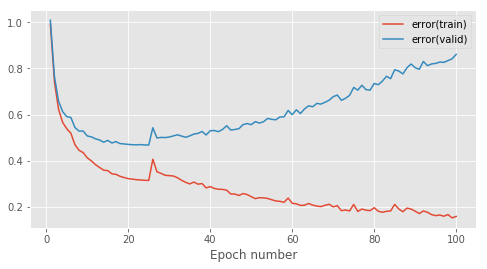

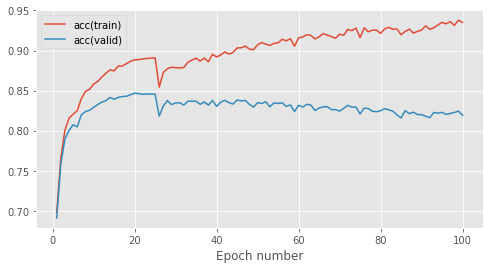

In [3]:
##############SGD With scheduler with special restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
range = 10
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

sgd_scheduler_special = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / range, max_learning_rate=learning_rate * range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_special)

In [ ]:
############# Adam BaseLine with no restart scheduler

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.00005
learning_range = 10
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_no_restart)

In [ ]:
############## Adam With scheduler with specified restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.00005
learning_range = 10
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

adam_scheduler_special = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

error = CrossEntropySoftmaxError() 

# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_special)